# Metody Numeryczne

## Rozwiązywanie równań różniczkowych



### dr hab. inż. Jerzy Baranowski, Prof.AGH

## Isaac Newton

*Data aequatione quodcunque fluentes quantitiae involvente fluxiones invenire et vice versa* 24 października 1676

Rozwiązywanie równań różniczkowych jest rzeczą pożyteczną

## Równania różniczkowe
Równanie różniczkowe
$$ 
\dot{x}=f(t,x)
$$
Rozwiązanie równania różniczkowego $x(t)$ to funkcja, która dla każdego $t$ spełnia
$$ 
\dot{x(t)}=f(t,x(t))
$$

## Problem Cauchy'ego

Wyznaczyć rozwiązanie równania dla $t\geq t_0$ przy czym
$$
x(t_0)=x_0
$$

Inaczej problem początkowy.

Wymiennie będziemy mówić o rozwiązywaniu i całkowaniu równań różniczkowych

## Metoda Eulera

**Istitutiones Calculi Integralis I** 1768

$$ 
\dot{x}=f(t,x),\quad x(t_0)=x_0, \quad x(T)=?
$$

W zależności od tego ile razy $f$ jest różniczkowalne możemy rozwinąć $x(t)$ w szereg Taylora. 
W szczególności
$$
x(t_0+\Delta t)=x_0+\Delta t\cdot f(t_0,x_0)+ \frac{\Delta t^2}{2}(f_t+f_x f)(t_0,x_0)+...
$$



## Metoda Eulera cd..
Podzielmy przedział $T$ na elementy (tzw. kroki)
$$
t_0,\ t_1,\ \ldots,\ t_{n-1},\ t_n
$$
i rozwiązanie w każdym podprzedziale zastępujemy pierwszym wyrazem szeregu Taylora
$$
\begin{aligned}
x_1-x_0={}&(t_1-t_0)f(t_0,x_0)\\
x_2-x_1={}&(t_2-t_1)f(t_1,x_1)\\
{}&\vdots\\
x_n-x_{n-1}={}&(t_n-t_{n-1})f(t_{n-1},x_{n-1})
\end{aligned}
$$
Oznaczając $h_i=t_{i+1}-t_i$ mamy rekurencję
$$
x_{k+1}=x_k + h_k f(t_k,x_k)
$$


## Metoda Eulera cd..
Niech $f (t, x)$ będzie ciągła, $|f|\leq A$  oraz $f$ spełnia warunek Lipshitza na zbiorze
$$
D=\left\{(t,x)\colon t_0 \leq t\leq T, |x−x0|\leq b \right\}
$$
Jeżeli $X − x_0 \leq b/A$ , mamy:

1. Dla $|\max_i h_i|\rightarrow0$ rozwiązanie rekurencuyjne zmierza do ciągłej funckji $ \phi(t)$.
2. $ \phi(t)$ jest ciągłym różniczkowalnym rozwiązaniem równania różniczkowego dla $t_0 \leq t\leq T$. 
3. Nie iestnieją inne rozwiązania równania na przedziale $t_0 \leq t\leq T$.

## Metoda Eulera cd..
Jeżeli w otoczeniu rozwiązania 
$$
f|\leq A,\quad \left|\frac{\partial f}{\partial x}\right|\leq L,\quad \left|\frac{\partial f}{\partial t}\right|\leq M
$$
Zachodzi oszacowanie
$$
\mathrm{error}(t)\leq\frac{M+AL}{L}\left(\mathrm{e}^{L(t-t_0)}-1\right)\cdot|h|
$$
przy założeniu dostatecznie małego $|h|$

## Konsekwencje
1. Błąd z kroku na krok jest rzędu $h$ (bo zgadza się szereg Taylora)
2. Metoda jest zbieżna do rozwiązania.
3. Błąd globalny (na całym przedziale) jest zależny od długości kroku i długości przedziału

Własności te przenoszą się też na bardziej skomplikowane metody.

## Jak to działa

Pierwszy problem testowy to układ równań liniowych:

$$
\dot{x}=\begin{bmatrix}0&1\\-1&0\end{bmatrix}x,\quad x_0=\begin{bmatrix}0\\1\end{bmatrix}
$$

który ma rozwiązanie analityczne
$$
x^*(t)=\begin{bmatrix}\sin(t)\\\cos(t)\end{bmatrix}
$$

In [18]:
import numpy as np
import matplotlib.pyplot as plt

test1=lambda t,x: np.array([x[1],-x[0]])

## Implementacja metody Eulera

In [2]:
def euler(f, x0,t0,tk,n):
    
    h=(tk-t0)/n
    x=np.empty((x0.size,n+1))
    x[:,0]=x0[:,0]
    for i in range(0,n):
        x[:,i+1]=x[:,i]+h*f(i*h,x[:,i])
    t=np.linspace(t0,tk,n+1)
    return (t,x.transpose())

# Przykładowe rozwiązania

In [19]:
x0=np.array([[0],[1]])
t0=0
tk=np.pi/2
n=50
(t,x)=euler(test1,x0,t0,tk,n)

In [20]:
plt.ioff()

plt.plot(t,x)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.gca().legend(('$x_1$','$x_2$'))
plt.grid()



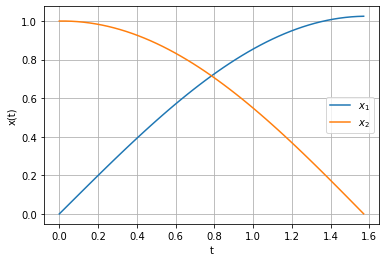

h=0.031415926535897934


In [21]:
plt.show()
print('h='+str((tk-t0)/n))

# Systematyczna ewaluacja
Do oceny jakości metody badamy jak zmienia się błąds w funkcji liczby wywołań prawej strony równania.

In [51]:
errors=[]
evals=[]
for k in range(1,7):
    _,x=euler(test1,x0,t0,tk,10**k)
    errors.append(np.linalg.norm(x[-1,:]-np.array([[1,0]])))
    evals.append(10**k)


In [52]:
plt.loglog(evals,errors,
           marker='s',ms=8,fillstyle='none',
           linestyle='')
plt.xlabel('Liczba wywołań prawej strony')
plt.ylabel('$\|x(t_k)-x^*(t_k)\|$')
plt.grid()

In [55]:
plt.show()

# Konkluzja metody Eulera

Metoda jest bardzo prosta, ale nie nadaje się do dokładnych obliczeń. 

Milion kroków na odcinku $\approx 1.5$s daje błąd (względny i bezwzględny) na poziomie jedynie $10^{-6}$.

# Wstęp do metod Rungego-Kutty

Oczywistym jest potrzeba poszukiwania metod rozwiązania o większej dokładności. Metoda Eulera wywodzi się z całkowania, można by zastosować inne kwadratury.

Całka na odcinku $[t_0,t_k]$ jest przecież rozwiązaniem równania różniczkowego:
$$
\dot{x}=f(t),\quad x(t_0)=x_0
$$
czyli 
$$
x(t_k)=x_0+\int_{t_0}^{t_k}f(t)\mathrm{d} t
$$

Prostym pomysłem jest tzw. **metoda punktu środkowego**, określająca kwadraturę

$$
\begin{aligned}
x(t_0+h)\approx {}&x_1 = x_0 + h f\left(t_0+\frac{h}{2}\right)\\
x(t_1+h)\approx {}&x_2 = x_1 + h f\left(t_1+\frac{h}{2}\right)\\
\vdots{}&\\
x(t_k)\approx {}&x_k = x_{k-1} + h f\left(t_{k-1}+\frac{h}{2}\right)
\end{aligned}
$$
Przy czym można wykazać, że błąd tej kwadratury jest mniejszy niż $C h^2$.

In [ ]:
x.shape


In [ ]:
test2(0,np.array([[0],[1]]))

In [ ]:
test(0,np.array([[0],[1]]))